# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Options Data for Indian Markets

NSEpy is a library to extract historical data for Indian Equity, Index, Derivative, and Volatility Index (INDIAVIX).  In this notebook, you will learn to fetch options data for the Indian equities and indices.
The notebook is divided into the following parts:
1. [Install NSEpy Package](#install) 
2. [Options Data for a Particular Strike Price](#same_strike)

<a id='install'></a> 
## Install NSEpy Package

You need first to pip install nsepy package to fetch the data. If nsepy module is not installed in your machine, then change the below cell from Markdown to Code and run.

You can use the below command to install the nsepy package in a command prompt or Spyder IDE.

`pip install nsepy`

<a id='same_strike'></a> 
# Options Data for a Particular Strike Price

You need to use `get_history` function from the `nsepy` to get the options data.

Syntax: 
```python
from nsepy import get_history
get_history(symbol,
            start,
            end
            index
            expiry_date,
            option_type,
            strike_price
            )
```
Parameters:

* `symbol`: Ticker of the index and stocks. For example;
        NIFTY or NIFTY 50,
        BANKNIFTY or NIFTY BANK,
        NIFTYINFRA or NIFTY INFRA,
    	NIFTYIT or NIFTY IT
        You can also pass the stocks ticker name such as 'HDFCBANK', 'TCS', 'RELIANCE'. 
Refer to the <a href="https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm" target="_blank"> nse website</a> to get the full list. 


* `start`: Start date of the contract


*  `end`: End date of the contract


*  `index`: Set this parameter to `True` if you fetch data for index such as NIFTY or BANKNIFTY. For options data of stocks such as 'HDFCBANK', set the parameter to `False`.


*  `expiry date`: Expiry date of the contract


*  `option_type`: `CE` for call and `PE` for put options


* `strike_price`: Strike price of the options contract
   
  
## Import libraries

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# Import get_history function from nsepy module
from nsepy import get_history

# For manipulating date 
from datetime import date

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
# Get options data for NIFTY index
nifty_options = get_history(symbol='NIFTY',
                            start=date(2020, 2, 1),
                            end=date(2021, 4, 29),
                            index=True,
                            expiry_date=date(2021, 4, 29),
                            option_type='CE',
                            strike_price=14500,
                            )

nifty_options.head()

,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Premium Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,,,,
2021-01-29,NIFTY,2021-04-29,CE,14500.0,302.00,325.15,270.25,270.50,271.2,270.50,9,9984000.0,196000.0,450,450,13634.60
2021-02-01,NIFTY,2021-04-29,CE,14500.0,252.00,520.00,243.05,502.60,520.0,502.60,74,82629000.0,2154000.0,3375,2925,NaN
2021-02-02,NIFTY,2021-04-29,CE,14500.0,617.85,748.15,566.00,702.45,709.9,702.45,85,96730000.0,4293000.0,2700,-675,14647.85
2021-02-03,NIFTY,2021-04-29,CE,14500.0,684.45,854.55,684.45,798.65,788.5,798.65,120,137884000.0,7384000.0,7725,5025,NaN
2021-02-04,NIFTY,2021-04-29,CE,14500.0,768.40,887.00,743.60,857.05,845.0,857.05,108,124091000.0,6641000.0,8250,525,14895.65


From the above output, you can see that NIFTY call options, 14500 strike price data, is fetched for the recent past three months. Each day, you get the 14500 strike price: `Open`, `High`, `Low`, `Close`, `Last` and `Settle Price`. You also get data for `Open Interest` and `Change in OI`, which are important parameters in analysing options.

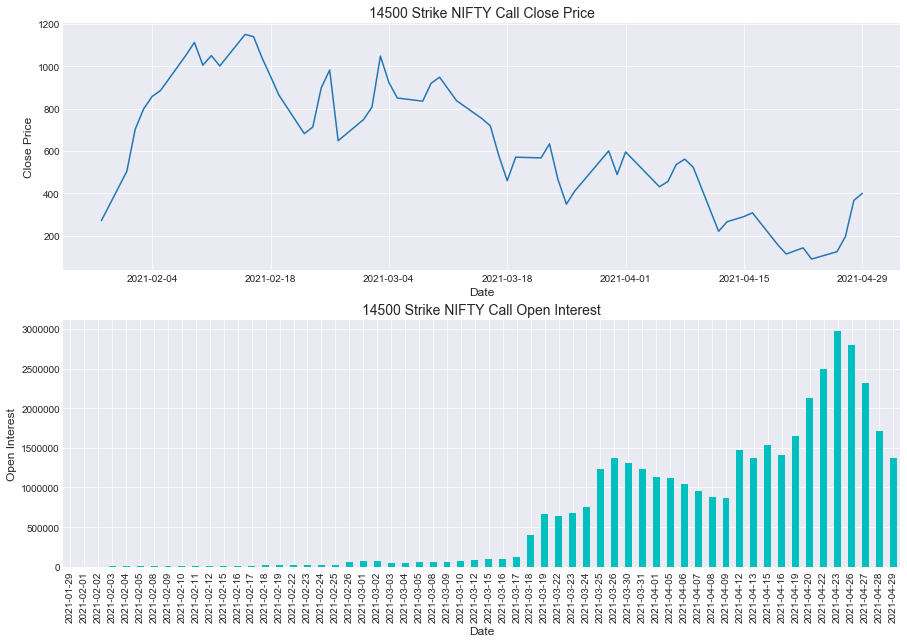

In [4]:
fig = plt.figure(figsize=(15, 10))

# Plot close prices
ax = fig.add_subplot(211)
ax.plot(nifty_options['Close'])
ax.set_title('14500 Strike NIFTY Call Close Price', fontsize=14)
ax.set_ylabel('Close Price', fontsize=12)
ax.set_xlabel('Date', fontsize=12)


# Plot the cumulative returns
ax = fig.add_subplot(212)
ax = nifty_options['Open Interest'].plot(kind='bar', color='c')
ax.set_title('14500 Strike NIFTY Call Open Interest', fontsize=14)
ax.set_ylabel('Open Interest', fontsize=12)
ax.set_xlabel('Date', fontsize=12)

plt.show()

## Conclusion

Indian equity and index options data for different strike prices can be fetched using NSEpy package. To get the list of stocks and index available in the Indian market, you can refer to the NSE official website.<br><br>